Pip install needed packages

In [ ]:
!pip install nltk
!pip install --upgrade kagglehub
!pip install torch torchvision
!pip install pandas matplotlib seaborn

#Imports

In [ ]:
import kagglehub
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Import Data from Kaggle

In [ ]:
# NLTK resources
nltk.download('stopwords')

# Download and load dataset
path = kagglehub.dataset_download("kazanova/sentiment140")
csv_path = f"{path}/training.1600000.processed.noemoticon.csv"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load dataset
cols = ['target', 'id', 'date', 'query', 'user', 'text']
df = pd.read_csv(csv_path, encoding='latin-1', names=cols)
df = df[['target', 'text']]

# Remap targets: 0=negative, 1=positive
df['target'] = df['target'].map({0: 0, 4: 1})

In [ ]:
def clean_tweet(tweet):
    tweet = tweet.lower() # lowercase
    tweet = re.sub(r'@\w+', '', tweet) # Removes Twitter usernames ( "Hey @User" -> "Hey " )
    tweet = re.sub(r'#\w+', '', tweet) # Removes hashtags ( "I Love #Python" -> "I Love " )
    tweet = re.sub(r'http\S+|www.\S+', '', tweet) # Removes all links
    tweet = re.sub(r'[^\w\s]', '', tweet) # Removes Punctuation
    tweet = re.sub(r'\s+', ' ', tweet).strip() # Whitespace
    tweet = ' '.join([word for word in tweet.split()])
    return tweet

# Clean the tweets
df['clean_text'] = df['text'].apply(clean_tweet)

In [ ]:
# Shuffle the dataset first
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Then perform the splits
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['target'])

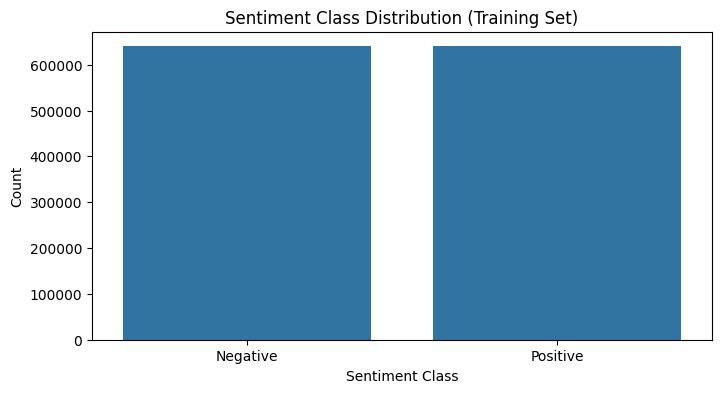

Train size: 1280000
Validation size: 160000
Test size: 160000


In [ ]:
# Check class distribution
plt.figure(figsize=(8,4))
sns.countplot(x='target', data=train_df)
plt.xticks([0,1], ['Negative', 'Positive'])
plt.title("Sentiment Class Distribution (Training Set)")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.show()

# Print dataset sizes
print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))

In [ ]:
# Display original and cleaned tweets
print(df[['text', 'clean_text']].head(10).to_string(index=False))


                                                                                                                                     text                                                                                                               clean_text
                                                                                                   @chrishasboobs AHHH I HOPE YOUR OK!!!                                                                                                       ahhh i hope your ok
                                                                                @misstoriblack cool , i have no tweet apps  for my razr 2                                                                                  cool i have no tweet apps for my razr 2
@TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u i know just family drama its lamehey next time u hang out with kim n u guys like have

In [ ]:
# Corpus size: total number of words across all cleaned tweets
corpus = ' '.join(df['clean_text'].values)
corpus_size = len(corpus.split())

# Vocabulary size: number of unique words
vocab = set(corpus.split())
vocab_size = len(vocab)

print(f"Corpus size (total number of words): {corpus_size}")
print(f"Vocabulary size (number of unique words): {vocab_size}")

# shaun comment


Corpus size (total number of words): 19955504
Vocabulary size (number of unique words): 441115
